# 1 MINUTE DATA

## MODEL 1: ALL FEATURES

In [1]:
%reset -f

In [2]:
# imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
# read data

march_df = pd.read_csv("BTC_1min_LTC_1min_march.csv")
april_df = pd.read_csv("BTC_1min_LTC_1min_april.csv")

In [4]:
# combine data

df = pd.concat([march_df, april_df], axis=0)

df['LTC Polarity'] = df['LTC Polarity'].fillna(value=df['LTC Polarity'].mean())
df['LTC Subjectivity'] = df['LTC Subjectivity'].fillna(value=df['LTC Subjectivity'].mean())
df['Net Polarity'] = df['Net Polarity'].fillna(value=df['Net Polarity'].mean())
df['Net Subjectivity'] = df['Net Subjectivity'].fillna(value=df['Net Subjectivity'].mean())

# split testing and training data

train_size = int(np.round(df.shape[0]*0.90))
test_size = int(np.round(df.shape[0]*0.10))

training_set = df.iloc[:train_size, 1:]
test_set = df.iloc[test_size:, 1:]

In [5]:
training_set.head()

,BTC Polarity,BTC Subjectivity,BTC Price,BTC Volume USD,LTC Polarity,LTC Subjectivity,LTC Price,LTC Volume USD,Net Polarity,Net Subjectivity,Net Volume,Price Ratio
0,0.065632,0.177339,45346.19,1.164993e+04,0.142857,0.278571,166.03,4073.107475,-0.077225,-0.101233,7.576819e+03,0.003661
1,0.066479,0.302075,45439.62,1.990020e+05,0.000000,0.200000,166.27,58.504682,0.066479,0.102075,1.989435e+05,0.003659
2,0.010654,0.253836,45262.05,1.721239e+05,0.000000,0.000000,165.25,147.778501,0.010654,0.253836,1.719761e+05,0.003651
3,0.021096,0.271541,45165.00,1.404933e+05,0.094549,0.259995,164.95,379.522146,0.001834,0.014291,1.401138e+05,0.003652
4,0.092320,0.272649,45120.64,1.404915e+06,0.000000,0.000000,164.74,81015.336680,0.092320,0.272649,1.323900e+06,0.003651


In [6]:
test_set.head()

,BTC Polarity,BTC Subjectivity,BTC Price,BTC Volume USD,LTC Polarity,LTC Subjectivity,LTC Price,LTC Volume USD,Net Polarity,Net Subjectivity,Net Volume,Price Ratio
8496,0.104967,0.177875,48631.71,13064.036920,0.094549,0.259995,180.52,0.000000,0.001834,0.014291,13064.036920,0.003712
8497,0.131218,0.334875,48607.22,69991.303440,0.094549,0.259995,180.42,9167.670635,0.001834,0.014291,60823.632805,0.003712
8498,0.113037,0.250726,48669.16,9615.179508,0.094549,0.259995,180.43,2870.100010,0.001834,0.014291,6745.079498,0.003707
8499,0.134462,0.386852,48639.95,25616.716070,0.094549,0.259995,180.43,4505.337100,0.001834,0.014291,21111.378970,0.003710
8500,0.084188,0.350329,48648.93,1266.818137,0.000000,1.000000,180.43,0.000000,0.084188,-0.649671,1266.818137,0.003709


In [7]:
# feature scaling

x_sc = MinMaxScaler(feature_range = (0, 1))
y_sc = MinMaxScaler(feature_range = (0, 1))

training_set.iloc[:, 0:11] = x_sc.fit_transform(training_set.iloc[:, 0:11])
training_set['Price Ratio'] = y_sc.fit_transform(training_set['Price Ratio'].values.reshape(-1,1))
training_set_scaled = training_set.values

In [8]:
# creating a data structure with 6 time-steps and 1 output
window = 10

X_train = []
y_train = []
for i in range(window, train_size):
    X_train.append(training_set_scaled[i-window:i, 0:11])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 11))

In [9]:
X_train.shape

(76453, 10, 11)

In [10]:
y_train.shape

(76453,)

In [11]:
# model

model_1 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model_1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50))
model_1.add(Dropout(0.2))

# Adding the output layer
model_1.add(Dense(units = 1))

# Compiling the RNN
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set

history_1 = model_1.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
2390/2390 [==============================] - 46s 17ms/step - loss: 0.0018
Epoch 2/20
2390/2390 [==============================] - 40s 17ms/step - loss: 6.3356e-04
Epoch 3/20
2390/2390 [==============================] - 45s 19ms/step - loss: 5.4992e-04
Epoch 4/20
2390/2390 [==============================] - 44s 18ms/step - loss: 5.1451e-04
Epoch 5/20
2390/2390 [==============================] - 43s 18ms/step - loss: 4.7784e-04
Epoch 6/20
2390/2390 [==============================] - 43s 18ms/step - loss: 4.7773e-04
Epoch 7/20
2390/2390 [==============================] - 41s 17ms/step - loss: 4.6552e-04
Epoch 8/20
2390/2390 [==============================] - 41s 17ms/step - loss: 4.5056e-04
Epoch 9/20
2390/2390 [==============================] - 44s 18ms/step - loss: 4.3727e-04
Epoch 10/20
2390/2390 [==============================] - 42s 18ms/step - loss: 4.4859e-04
Epoch 11/20
2390/2390 [==============================] - 42s 18ms/step - loss: 4.4490e-04
Epoch 12/20
2390/2390 [

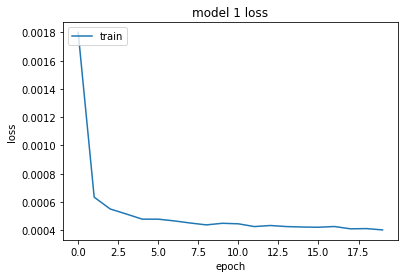

In [13]:
plt.plot(history_1.history['loss'])
#plt.plot(history_1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# prep inputs to get predictions

dataset_train = df.iloc[:train_size, 1:]
dataset_test = df.iloc[train_size:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

dataset_total.iloc[:, 0:11] = x_sc.fit_transform(dataset_total.iloc[:, 0:11])
dataset_total['Price Ratio'] = y_sc.fit_transform(dataset_total['Price Ratio'].values.reshape(-1,1))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - window:].values
inputs = inputs.reshape(-1,12)

X_test = []
for i in range(window, test_size+window):
    X_test.append(inputs[i-window:i, 0:11])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 11))

# get predictions

predicted_values = model_1.predict(X_test)
predicted_values = y_sc.inverse_transform(predicted_values)

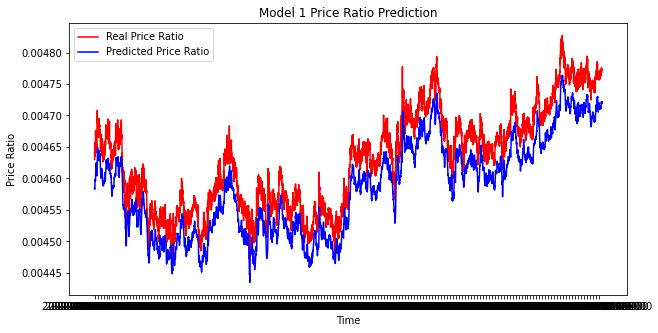

In [15]:
# visualising the results

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[train_size:, 0], dataset_test['Price Ratio'].values, color = 'red', label = 'Real Price Ratio')
plt.plot(df.iloc[train_size:, 0], predicted_values, color = 'blue', label = 'Predicted Price Ratio')
plt.xticks(np.arange(0,test_size,50))
plt.title('Model 1 Price Ratio Prediction')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.legend()

plt.show()

In [16]:
# rmse

rmse = mean_squared_error(dataset_test['Price Ratio'].values, predicted_values, squared=False)
print(rmse)

4.482693251677595e-05


In [17]:
# std

test_std = np.std(dataset_test['Price Ratio'].values)
print(test_std)

7.84626113425437e-05


## MODEL 2: ONLY SENTIMENT DATA

In [18]:
%reset -f

In [19]:
# imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [20]:
# read data

march_df = pd.read_csv("BTC_1min_LTC_1min_march.csv")
april_df = pd.read_csv("BTC_1min_LTC_1min_april.csv")

In [21]:
# combine data

df = pd.concat([march_df, april_df], axis=0)

df['LTC Polarity'] = df['LTC Polarity'].fillna(value=df['LTC Polarity'].mean())
df['LTC Subjectivity'] = df['LTC Subjectivity'].fillna(value=df['LTC Subjectivity'].mean())
df['Net Polarity'] = df['Net Polarity'].fillna(value=df['Net Polarity'].mean())
df['Net Subjectivity'] = df['Net Subjectivity'].fillna(value=df['Net Subjectivity'].mean())

df = df[["Timestamp", "BTC Polarity", "LTC Polarity", "BTC Subjectivity", "LTC Subjectivity", "Net Polarity", "Net Subjectivity", "Price Ratio"]]

# split testing and training data

train_size = int(np.round(df.shape[0]*0.90))
test_size = int(np.round(df.shape[0]*0.10))

training_set = df.iloc[:train_size, 1:]
test_set = df.iloc[test_size:, 1:]

In [22]:
training_set.head()

,BTC Polarity,LTC Polarity,BTC Subjectivity,LTC Subjectivity,Net Polarity,Net Subjectivity,Price Ratio
0,0.065632,0.142857,0.177339,0.278571,-0.077225,-0.101233,0.003661
1,0.066479,0.000000,0.302075,0.200000,0.066479,0.102075,0.003659
2,0.010654,0.000000,0.253836,0.000000,0.010654,0.253836,0.003651
3,0.021096,0.094549,0.271541,0.259995,0.001834,0.014291,0.003652
4,0.092320,0.000000,0.272649,0.000000,0.092320,0.272649,0.003651


In [23]:
test_set.head()

,BTC Polarity,LTC Polarity,BTC Subjectivity,LTC Subjectivity,Net Polarity,Net Subjectivity,Price Ratio
8496,0.104967,0.094549,0.177875,0.259995,0.001834,0.014291,0.003712
8497,0.131218,0.094549,0.334875,0.259995,0.001834,0.014291,0.003712
8498,0.113037,0.094549,0.250726,0.259995,0.001834,0.014291,0.003707
8499,0.134462,0.094549,0.386852,0.259995,0.001834,0.014291,0.003710
8500,0.084188,0.000000,0.350329,1.000000,0.084188,-0.649671,0.003709


In [24]:
# feature scaling

x_sc = MinMaxScaler(feature_range = (0, 1))
y_sc = MinMaxScaler(feature_range = (0, 1))

training_set.iloc[:, 0:6] = x_sc.fit_transform(training_set.iloc[:, 0:6])
training_set['Price Ratio'] = y_sc.fit_transform(training_set['Price Ratio'].values.reshape(-1,1))
training_set_scaled = training_set.values

In [25]:
# creating a data structure with 6 time-steps and 1 output

window = 10

X_train = []
y_train = []
for i in range(window, train_size):
    X_train.append(training_set_scaled[i-window:i, 0:6])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

In [26]:
X_train.shape

(76453, 10, 6)

In [27]:
y_train.shape

(76453,)

In [28]:
# model

model_2 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model_2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50))
model_2.add(Dropout(0.2))

# Adding the output layer
model_2.add(Dense(units = 1))

# Compiling the RNN
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
# Fitting the RNN to the Training set

history_2 = model_2.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
2390/2390 [==============================] - 53s 19ms/step - loss: 0.0490
Epoch 2/20
2390/2390 [==============================] - 44s 19ms/step - loss: 0.0472
Epoch 3/20
2390/2390 [==============================] - 41s 17ms/step - loss: 0.0468
Epoch 4/20
2390/2390 [==============================] - 41s 17ms/step - loss: 0.0466
Epoch 5/20
2390/2390 [==============================] - 41s 17ms/step - loss: 0.0464
Epoch 6/20
2390/2390 [==============================] - 45s 19ms/step - loss: 0.0463
Epoch 7/20
2390/2390 [==============================] - 48s 20ms/step - loss: 0.0461
Epoch 8/20
2390/2390 [==============================] - 47s 20ms/step - loss: 0.0459
Epoch 9/20
2390/2390 [==============================] - 43s 18ms/step - loss: 0.0458
Epoch 10/20
2390/2390 [==============================] - 43s 18ms/step - loss: 0.0456
Epoch 11/20
2390/2390 [==============================] - 42s 18ms/step - loss: 0.0454
Epoch 12/20
2390/2390 [==============================] - 42s 18

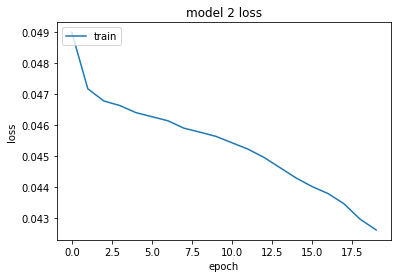

In [30]:
plt.plot(history_2.history['loss'])
#plt.plot(history_2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
# prep inputs to get predictions

dataset_train = df.iloc[:train_size, 1:]
dataset_test = df.iloc[train_size:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

dataset_total.iloc[:, 0:6] = x_sc.fit_transform(dataset_total.iloc[:, 0:6])
dataset_total['Price Ratio'] = y_sc.fit_transform(dataset_total['Price Ratio'].values.reshape(-1,1))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - window:].values
inputs = inputs.reshape(-1,7)

X_test = []
for i in range(window, test_size+window):
    X_test.append(inputs[i-window:i, 0:6])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

# get predictions

predicted_values = model_2.predict(X_test)
predicted_values = y_sc.inverse_transform(predicted_values)

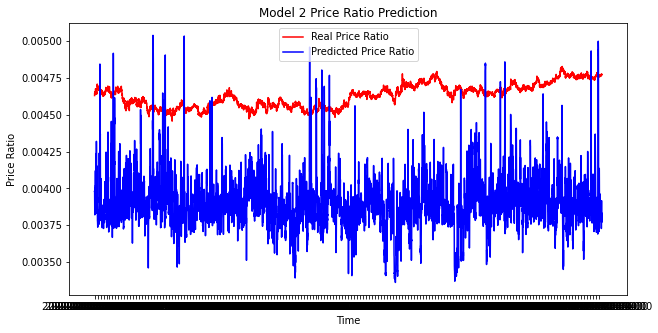

In [32]:
# visualising the results

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[train_size:, 0], dataset_test['Price Ratio'].values, color = 'red', label = 'Real Price Ratio')
plt.plot(df.iloc[train_size:, 0], predicted_values, color = 'blue', label = 'Predicted Price Ratio')
plt.xticks(np.arange(0,test_size,50))
plt.title('Model 2 Price Ratio Prediction')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.legend()

plt.show()

In [33]:
# rmse

rmse = mean_squared_error(dataset_test['Price Ratio'].values, predicted_values, squared=False)
print(rmse)

0.0007547445955539389


In [34]:
# std

test_std = np.std(dataset_test['Price Ratio'].values)
print(test_std)

7.84626113425437e-05


## MODEL 3: ONLY FINANCIAL DATA

In [35]:
%reset -f

In [36]:
# imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [37]:
# read data

march_df = pd.read_csv("BTC_1min_LTC_1min_march.csv")
april_df = pd.read_csv("BTC_1min_LTC_1min_april.csv")

In [38]:
# combine data

df = pd.concat([march_df, april_df], axis=0)

df['LTC Polarity'] = df['LTC Polarity'].fillna(value=df['LTC Polarity'].mean())
df['LTC Subjectivity'] = df['LTC Subjectivity'].fillna(value=df['LTC Subjectivity'].mean())
df['Net Polarity'] = df['Net Polarity'].fillna(value=df['Net Polarity'].mean())
df['Net Subjectivity'] = df['Net Subjectivity'].fillna(value=df['Net Subjectivity'].mean())

df = df[["Timestamp", "BTC Price", "LTC Price", "BTC Volume USD", "LTC Volume USD", "Net Volume", "Price Ratio"]]

# split testing and training data

train_size = int(np.round(df.shape[0]*0.90))
test_size = int(np.round(df.shape[0]*0.10))

training_set = df.iloc[:train_size, 1:]
test_set = df.iloc[test_size:, 1:]

In [39]:
training_set.head()

,BTC Price,LTC Price,BTC Volume USD,LTC Volume USD,Net Volume,Price Ratio
0,45346.19,166.03,1.164993e+04,4073.107475,7.576819e+03,0.003661
1,45439.62,166.27,1.990020e+05,58.504682,1.989435e+05,0.003659
2,45262.05,165.25,1.721239e+05,147.778501,1.719761e+05,0.003651
3,45165.00,164.95,1.404933e+05,379.522146,1.401138e+05,0.003652
4,45120.64,164.74,1.404915e+06,81015.336680,1.323900e+06,0.003651


In [40]:
test_set.head()

,BTC Price,LTC Price,BTC Volume USD,LTC Volume USD,Net Volume,Price Ratio
8496,48631.71,180.52,13064.036920,0.000000,13064.036920,0.003712
8497,48607.22,180.42,69991.303440,9167.670635,60823.632805,0.003712
8498,48669.16,180.43,9615.179508,2870.100010,6745.079498,0.003707
8499,48639.95,180.43,25616.716070,4505.337100,21111.378970,0.003710
8500,48648.93,180.43,1266.818137,0.000000,1266.818137,0.003709


In [41]:
# feature scaling

x_sc = MinMaxScaler(feature_range = (0, 1))
y_sc = MinMaxScaler(feature_range = (0, 1))

training_set.iloc[:, 0:5] = x_sc.fit_transform(training_set.iloc[:, 0:5])
training_set['Price Ratio'] = y_sc.fit_transform(training_set['Price Ratio'].values.reshape(-1,1))
training_set_scaled = training_set.values

In [42]:
# creating a data structure with 6 time-steps and 1 output

window = 10

X_train = []
y_train = []
for i in range(window, train_size):
    X_train.append(training_set_scaled[i-window:i, 0:5])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

In [43]:
X_train.shape

(76453, 10, 5)

In [44]:
y_train.shape

(76453,)

In [45]:
# model

model_3 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model_3.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50))
model_3.add(Dropout(0.2))

# Adding the output layer
model_3.add(Dense(units = 1))

# Compiling the RNN
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
# Fitting the RNN to the Training set

history_3 = model_3.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
2390/2390 [==============================] - 50s 18ms/step - loss: 0.0016
Epoch 2/20
2390/2390 [==============================] - 48s 20ms/step - loss: 5.9232e-04
Epoch 3/20
2390/2390 [==============================] - 46s 19ms/step - loss: 5.1580e-04
Epoch 4/20
2390/2390 [==============================] - 44s 18ms/step - loss: 4.7429e-04
Epoch 5/20
2390/2390 [==============================] - 44s 18ms/step - loss: 4.7208e-04
Epoch 6/20
2390/2390 [==============================] - 43s 18ms/step - loss: 4.4917e-04
Epoch 7/20
2390/2390 [==============================] - 46s 19ms/step - loss: 4.4712e-04
Epoch 8/20
2390/2390 [==============================] - 43s 18ms/step - loss: 4.4252e-04
Epoch 9/20
2390/2390 [==============================] - 44s 19ms/step - loss: 4.2821e-04
Epoch 10/20
2390/2390 [==============================] - 43s 18ms/step - loss: 4.2740e-04
Epoch 11/20
2390/2390 [==============================] - 44s 18ms/step - loss: 4.3220e-04
Epoch 12/20
2390/2390 [

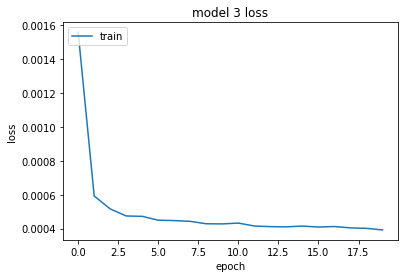

In [47]:
plt.plot(history_3.history['loss'])
#plt.plot(history_3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
# prep inputs to get predictions

dataset_train = df.iloc[:train_size, 1:]
dataset_test = df.iloc[train_size:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

dataset_total.iloc[:, 0:5] = x_sc.fit_transform(dataset_total.iloc[:, 0:5])
dataset_total['Price Ratio'] = y_sc.fit_transform(dataset_total['Price Ratio'].values.reshape(-1,1))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - window:].values
inputs = inputs.reshape(-1,6)

X_test = []
for i in range(window, test_size+window):
    X_test.append(inputs[i-window:i, 0:5])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

# get predictions

predicted_values = model_3.predict(X_test)
predicted_values = y_sc.inverse_transform(predicted_values)

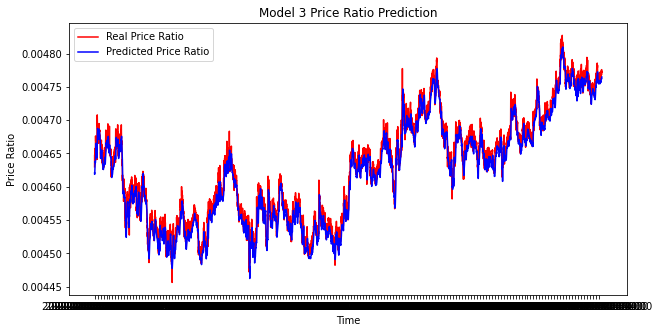

In [49]:
# visualising the results

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[train_size:, 0], dataset_test['Price Ratio'].values, color = 'red', label = 'Real Price Ratio')
plt.plot(df.iloc[train_size:, 0], predicted_values, color = 'blue', label = 'Predicted Price Ratio')
plt.xticks(np.arange(0,test_size,50))
plt.title('Model 3 Price Ratio Prediction')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.legend()

plt.show()

In [50]:
# rmse

rmse = mean_squared_error(dataset_test['Price Ratio'].values, predicted_values, squared=False)
print(rmse)

1.3156317388265942e-05


In [51]:
# std

test_std = np.std(dataset_test['Price Ratio'].values)
print(test_std)

7.84626113425437e-05
